In [41]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Basic Analysis of the correlation between SPX(S&P 500) and VIX.

In [20]:
spy = yf.download('^GSPC', start='2018-01-02', end='2023-03-01')
spy.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-22,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000
2023-02-23,4018.600098,4028.300049,3969.189941,4012.320068,4012.320068,3952940000
2023-02-24,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3877700000
2023-02-27,3992.360107,4018.050049,3973.550049,3982.239990,3982.239990,3836950000
2023-02-28,3977.189941,3997.500000,3968.979980,3970.149902,3970.149902,5043400000


In [21]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1298 entries, 2018-01-02 to 2023-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1298 non-null   float64
 1   High       1298 non-null   float64
 2   Low        1298 non-null   float64
 3   Close      1298 non-null   float64
 4   Adj Close  1298 non-null   float64
 5   Volume     1298 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 71.0 KB


In [22]:
vix = yf.download('^VIX', start='2018-01-01', end='2023-03-01')
vix.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-22,23.030001,23.629999,22.020000,22.290001,22.290001,0
2023-02-23,21.959999,22.430000,20.889999,21.139999,21.139999,0
2023-02-24,21.350000,22.900000,21.320000,21.670000,21.670000,0
2023-02-27,21.990000,22.020000,20.680000,20.950001,20.950001,0
2023-02-28,21.299999,21.370001,20.100000,20.700001,20.700001,0


In [23]:
vix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1298 entries, 2018-01-02 to 2023-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1298 non-null   float64
 1   High       1298 non-null   float64
 2   Low        1298 non-null   float64
 3   Close      1298 non-null   float64
 4   Adj Close  1298 non-null   float64
 5   Volume     1298 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 71.0 KB


In [24]:
# df with the adj close prices of spy and vix.
df = pd.DataFrame({
    'SPX': spy['Adj Close'],
    'VIX': vix['Adj Close']
})

In [26]:
df.sample(5)

,SPX,VIX
Date,,
2021-09-23,4448.979980,18.629999
2020-03-02,3090.229980,33.419998
2019-09-13,3007.389893,13.740000
2022-07-22,3961.629883,23.030001
2020-03-04,3130.120117,31.990000


In [27]:
df.describe()

,SPX,VIX
count,1298.000000,1298.000000
mean,3466.818659,21.282874
std,666.097449,8.330983
min,2237.399902,9.150000
25%,2852.757507,15.745000
50%,3326.625000,19.825000
75%,4069.760071,24.977499
max,4796.560059,82.690002


<AxesSubplot:xlabel='Date'>

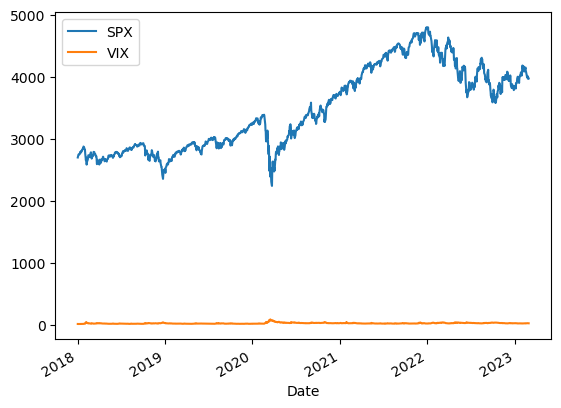

In [28]:
df.plot()

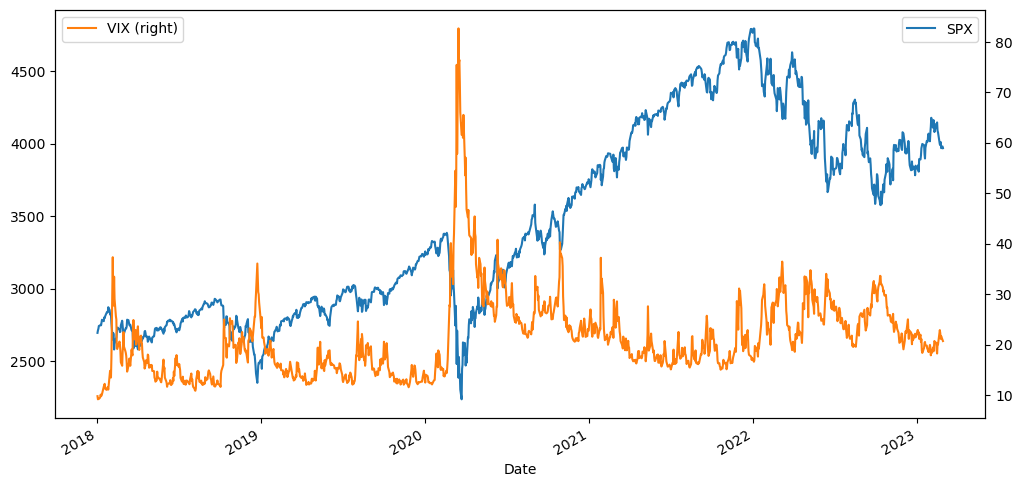

In [30]:
plt.figure(figsize=(12, 6))

ax_spx = df['SPX'].plot()
ax_vix = df['VIX'].plot(secondary_y=True)

ax_spx.legend(loc=1)
ax_vix.legend(loc=2)

plt.show();

Visually we can see that when the S&p 500 goes up, the vix goes down. 
<br>Negative Correlation.


array([[<AxesSubplot:title={'center':'SPX'}>,
        <AxesSubplot:title={'center':'VIX'}>]], dtype=object)

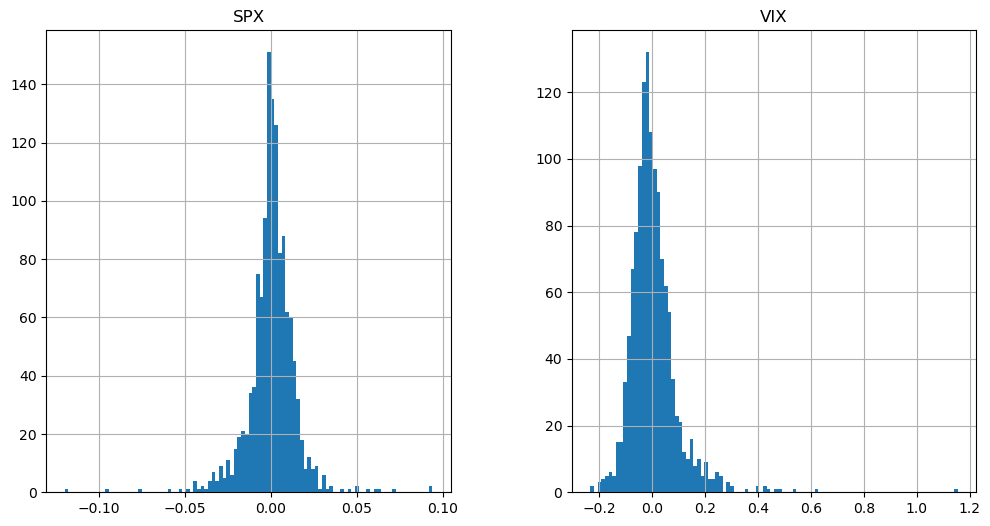

In [31]:
# plot the dist of the daily returns
df.pct_change().hist(figsize=(12, 6),
                     bins=100)

get the log returns. Because of normalization - avoid the problem of negative prices.


In [32]:
log_returns = np.log(df / df.shift(1)).dropna()
log_returns

,SPX,VIX
Date,,
2018-01-03,0.006378,-0.065563
2018-01-04,0.004021,0.007621
2018-01-05,0.007009,0.000000
2018-01-08,0.001661,0.032020
2018-01-09,0.001302,0.057158
...,...,...
2023-02-22,-0.001575,-0.025688
2023-02-23,0.005315,-0.052971
2023-02-24,-0.010593,0.024762


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

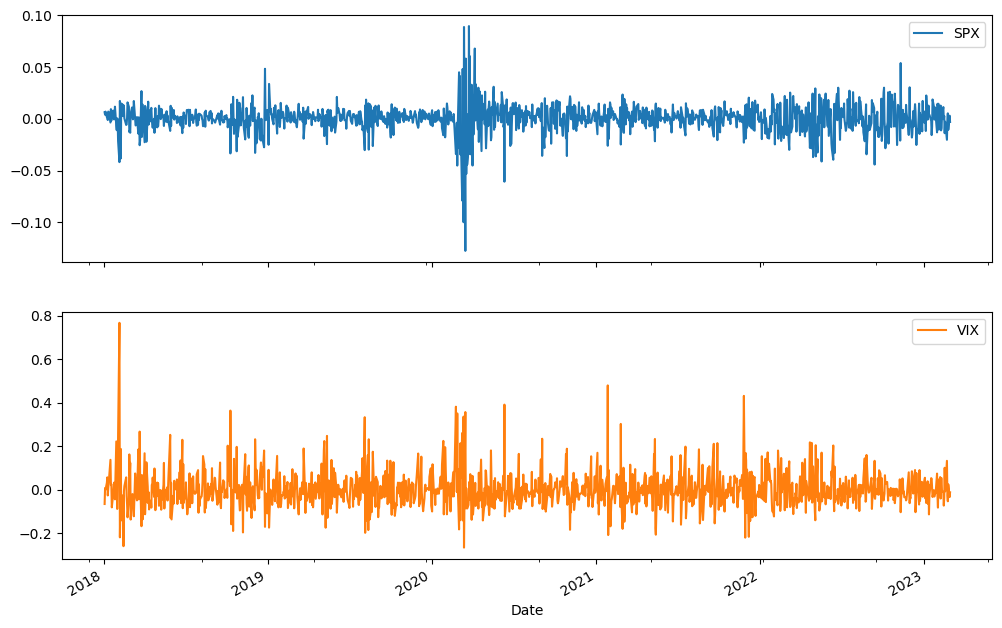

In [39]:
log_returns.plot(figsize=(12, 8), subplots=True)

Correlation between SPX and VIX

In [40]:
log_returns.corr()

,SPX,VIX
SPX,1.000000,-0.713753
VIX,-0.713753,1.000000


In [42]:
corr = log_returns.corr()
corr.style.background_gradient(cmap='coolwarm')

,SPX,VIX
SPX,1.000000,-0.713753
VIX,-0.713753,1.000000


<AxesSubplot:xlabel='SPX', ylabel='VIX'>

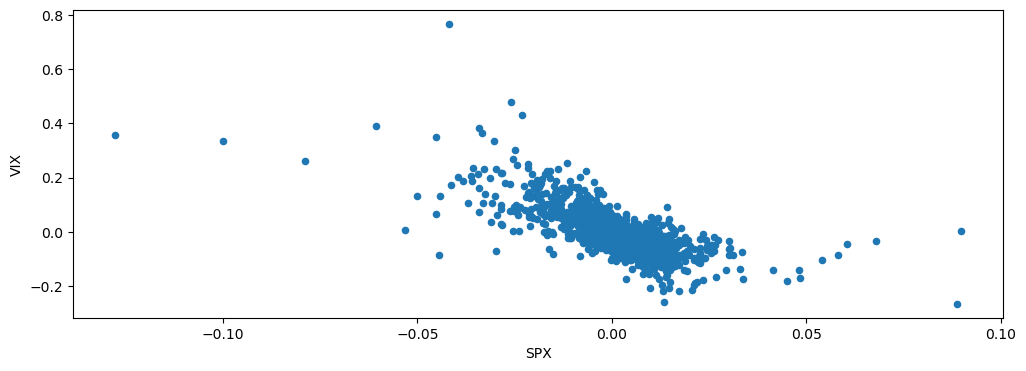

In [44]:
log_returns.plot(figsize=(12, 4),
                 x='SPX',
                 y='VIX',
                 kind='scatter')

In [45]:
# fit a line
ols_fit = sm.OLS(log_returns['VIX'].values, log_returns['SPX'].values).fit()
ols_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.509
Model:                            OLS   Adj. R-squared (uncentered):              0.509
Method:                 Least Squares   F-statistic:                              1343.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):                   2.15e-202
Time:                        23:33:21   Log-Likelihood:                          1833.0
No. Observations:                1297   AIC:                                     -3664.
Df Residuals:                    1296   BIC:                                     -3659.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.3641      0.119    -36.651      0.000      -4.598      -4.130
==============================================================================
Omnibus:                      526.048   Durbin-Watson:                   2.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7966.423
Skew:                           1.464   Prob(JB):                         0.00
Kurtosis:                      14.783   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

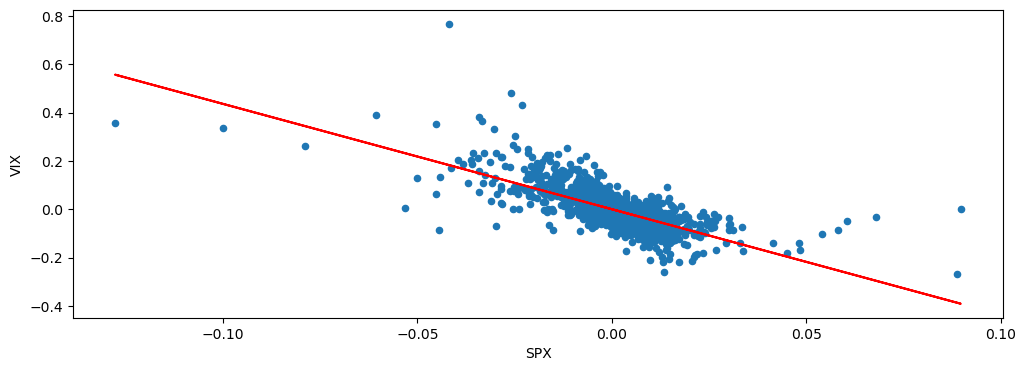

In [46]:
log_returns.plot(figsize=(12, 4),
                 x='SPX',
                 y='VIX',
                 kind='scatter')
plt.plot(log_returns['SPX'], ols_fit.fittedvalues, 'r')

Plot the moving-window correlation of the two series

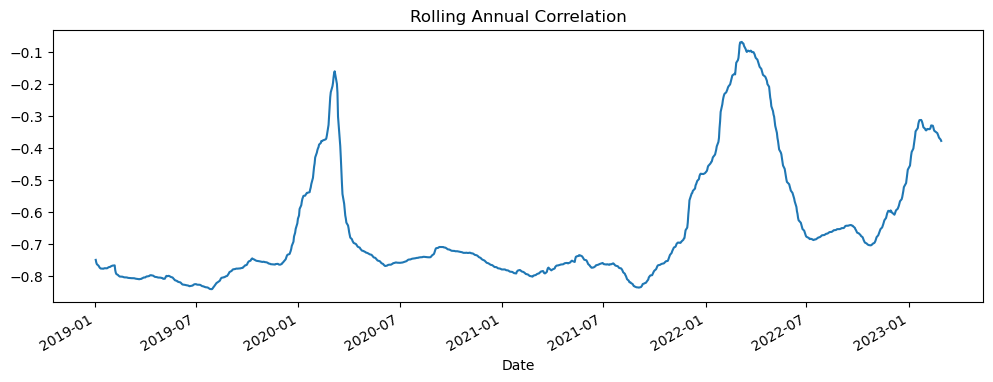

In [48]:
df_corr = df['SPX'].rolling(252).corr(other=df['VIX'])
df_corr.plot(figsize=(12, 4))
plt.title('Rolling Annual Correlation')
plt.show();

We can see that the SPX and VIX are negatively correlated, fluctuating between -01 and -0.8
of the 252 trading years of the year.